# 支撑向量机（Support Vector Machine）
使用支撑向量机的思想，既可以解决分类问题，也可以解决回归问题。 如下图在一个二维的特征平面中，所有的点被分成了红色和蓝色两类，逻辑回归就在这个特征平面中找到了一个决策边界，分类算法告诉我们，如果在决策边界的一侧，我们就认为这些数据属于某一类，在另外一侧就属于另外一类，但是对于一些数据存在这样的问题：

> 决策边界并不唯一

![](img/isea52.jpg)
对于这种决策边界不唯一的问题，我们通常称之为**不适定** 问题，在逻辑回归中，解决不适定问题的方法是，定义一个概率函数sigmoid函数，根据这个概率函数进行建模，形成一个损失函数，最小化这个损失函数，从而求出一条决策边界，这就是逻辑回归解决这个问题的思路。在这里，这个损失函数是完全由我们训练数据集所决定的。支撑向量机解决问题的思路稍微有些不同。 


假设我们得到了如下图的决策平面，在我们的训练数据集上，我们非常好的将数据分成了两个部分，但是现在，对于 机器学习算法来说，有一个非常重要的问题，就是算法的泛化能力，换句话说，当我们求出了决策边界之后，这个决策边界对于没有看见的那些样本他是不是好的决策边界，他能不能非常好的得到那些未知的数据的分类结果呢？

![](img/isea53.png)

如图所示，我们所求出的决策边界的泛化效果并不怎么好，这是为什么呢？这是因为我们得到的决策比边界离红色的点离的太近了，这就导致了其他的离红色的点很有可能就被误分在了决策边界的另外一侧。
 
 上图的决策边界的泛化能力较差。根据这个思想，什么样的决策边界其泛化能力比较好呢？

![](img/isea54.png)
* $d$ 支撑向量距离决策边界的距离
* $margin = 2 \cdot d$ 
* SVM算法的目标就是最大化$margin$

机器学习尤其是参数学习算法来说，一个固定的套路就是把我们要解决问题的思想转化成一个最优化的问题，然后再去求解这个最优化问题。


上图所示的决策边界的特点：
 * 这些点离这根直线的距离都尽可能的远（表征所有的样本点都离直线最远）。
 * 很好的分别红色和蓝色的两个类别相应的数据点 
 * SVM在统计学习中也是一个非常重要的方法

**Hard Margin SVM** ：切实的找到了一个决策边界（一条直线或者是一个超平面），将所有的样本点进行了正确的划分，同时最大化了margin，也即解决的是线性可分的问题。

但是在真实的情况下，很多数据是线性不肯可分的，这种情况下，我们的SVM可以通过进一步的改进得到**Soft Margin SVM** ，soft margin svm就是在hard margin SVM的基础上进行改进。

###  $soft margin$ 表达式推导

解析几何中，点到直线的距离公式，$(x,y)$ 到 $Ax + By + C = 0$ 的距离为：$\frac{|Ax + By + C|}{\sqrt{A^2 + B^2}}$

拓展到$n$维空间中，$\theta^{T}x_b = 0$ (更换一下表达式) $w^{T}x + b = 0$，那么距离为：
$\frac{|w^{T}y + b|}{|w|}$，其中 $|w| = \sqrt{w_1^{2} + w_2^{2}+...+w_n^{2}}$
* $|w|$表示的$w$的模

![](img/svm/svm1.jpg)

对于上面的公式，由于分母是一个数，我们对分子进行除法运算的话，$w^{T}$ 除以分母得到$w^{T}_{d}$， $b$除以分母得到$b_d$

即可得到如下的公式：
* $w^{T}_{d}x^{(i)} + b_d >= 1 $           $\forall{y_{(i)}} = 1$(任意)
* $w^{T}_{d}x^{(i)} + b_d >= 1 $           $\forall{y_{(i)}} = -1$  

所以支撑向量构成的两条边界的直线（也即是决策边界的上下两条边界）和决策边界
* 上     ： $w^{T}_{d}x^{(i)} + b_d = 1 $
* 决策边界 ： $w^{T}_{d}x^{(i)} + b_d = 0$
* 下     ： $w^{T}_{d}x^{(i)} + b_d = -1 $

重新命名变量：
* 上     ： $w^{T}x^{(i)} + b = 1 $
* 决策边界 ： $w^{T}x^{(i)} + b = 0 $
* 下     ： $w^{T}x^{(i)} + b = -1 $


将上述两个公式合成一个公式
$y^{(i)}(w^{T}x^{(i)} + b) >= 1$,对于任意和支撑向量$x$

$max \frac{w^T x + b}{ |w|}$

由于x都是支撑向量，带入分子之后的结果都是1，所以最大化上述公式变成了变成了

$min|w|$ 为了方便求导得到如下，$min \frac{1}{2}|w|^{2}$（在 $y^{(i)}(w^{T}x^{(i)} + b) >= 1$）

所以上述最优化问题，其实是局部最优化问题。

全局最优化问题相对简单，只要求导为零极值点即为最值点，当是局部最小化的问题的时候，求解方法变得复杂，也即需要拉普拉斯算子来进行求解，对于有条件的最优化问题，具体如何求解这里由于比较复杂，不作说明。

但是要记住：支撑向量机这样的一个思想最终用数学表达式表达出来就是在最优化一个有条件的目标函数：

$min \frac{1}{2} |w|^{2}$ 

$s.t. y^{(i)} (w^{T}x^{(i)}  + b) >= 1$

### Soft Margin 和 SVM 的正则化

为了考虑模型的泛化能力，可以对一些点记性错误的划分。但是如果数据是线性不可分的，也即没有任何一条直线能够将数据分类，那么hard margin SVM 无法对数据进行拟合，需要使用soft margin SVM，如下：

![](img/svm/svm2.jpg)

#### L1正则

最中的目标函数为：

$min \frac{1}{2} |w|^{1} + C \sum ^{m}_{i = 1} \zeta_{i}$

$s.t  y^{i}(w^{T}x^{(i)} + b) >= 1 - \zeta_{i}$

$\zeta{i} >= 0$

此时是L1正则，这里添加正则化项，避免我们的模型太极端。这就是机器学习的套路，加入正则化项，本质就是让我们的模型针对训练数据集有更高的容错能力，当我们有了这样的容错能力之后，是的模型对训练数据集中那些极端的数据点不那么敏感，使用这样的方式，来使得模型的泛化能力得到提升。 

#### L2正则

$min \frac{1}{2} |w|^{1} + C \sum ^{m}_{i = 1} \zeta_{i}^{2}$

$s.t  y^{i}(w^{T}x^{(i)} + b) >= 1 - \zeta_{i}$

$\zeta{i} >= 0$

L1：绝对值
L2：平方

#### SVM  在sk-learn 中的使用

和KNN一样，需要对数据进行标准化处理，因为SVM设计到了距离，需要对数据在量纲上是统一的

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

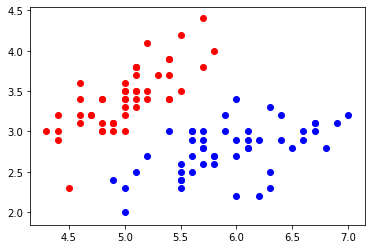

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [10]:
from sklearn.svm import LinearSVC

# C 的取值越大，越是相对于是一个hard svm
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


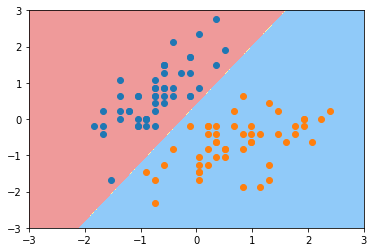

In [11]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [12]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


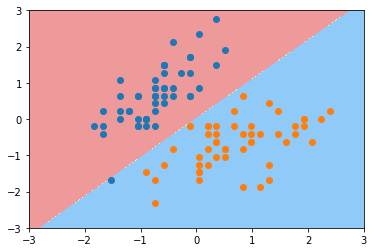

In [13]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

$C$ 越大，容错空间越小；反之，容错空间越大

In [14]:
svc.coef_

array([[ 4.03242283, -2.49296087]])

上：获取系数，系数值有两个，以为对于现在的数据中特征有两个，这两个特征每个特征都对应着一个系数。返回的系数是一个二维数组，sk-learn封装的SVM，可以直接处理多分类问题，如果有多个类别，就会有多条直线来分割特征平面。没根直线都有其系数。

In [32]:
# 截距
svc.intercept_

array([0.95368235])

In [33]:
# 将margin 对应的上线两个先也绘制出来。

def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


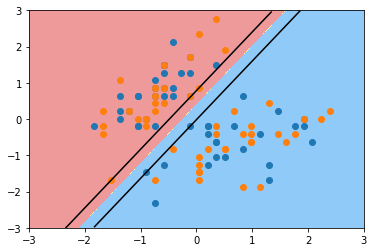

In [34]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


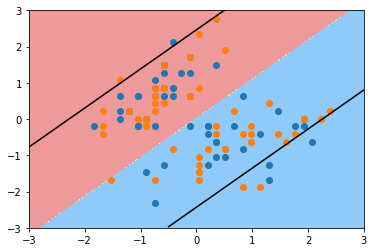

In [35]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

### SVM中使用多项式，来处理非线性问题

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from sklearn import datasets

X, y = datasets.make_moons()

In [59]:
X.shape

(100, 2)

In [60]:
y.shape

(100,)

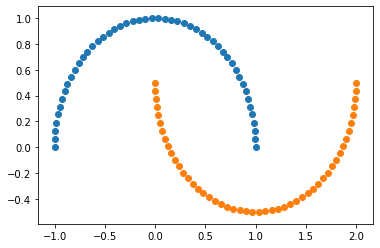

In [61]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

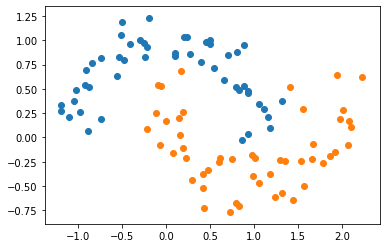

In [62]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 使用多项式的SVM

In [63]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [64]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearSVC', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [65]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


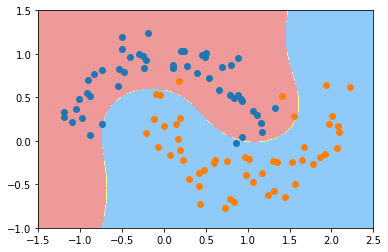

In [66]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 使用多项式核函数的SVM

对于SVM算法来说，sk-learn的封装中，其实可以不使用Polynomial feature 的方式将数据进行转为为有多项式的特征，svm有特殊的方式可以直接使用多项式的特征，这种方式成为多项式核。

In [67]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))
    ])

In [68]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


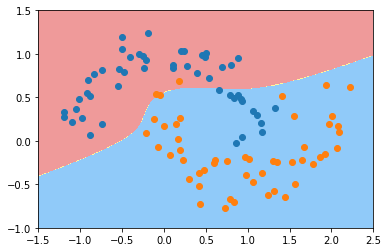

In [69]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 什么是核函数

略。